# Data Visualization
- 데이터 품질 및 분포 특성을 시각적으로 확인하기 위해 사용
- 데이터 이해 및 분석 결과를 설득력 있게 표현하기 위해 사용

**모집단** : 분석의 대상이 되는 전체 집단

**표본집단** : 모집단에서 추출된 모집단의 부분집합

---

- 모집단의 특성을 추정하기 위해서 통계적인 기법을 사용함

In [ ]:
# iris 데이터셋 가져오기
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
setosa_petal_length = iris[iris['species']=='setosa']['petal_length']

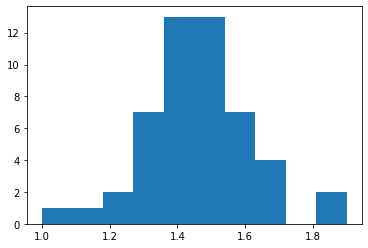

In [ ]:
import matplotlib.pyplot as plt
plt.hist(setosa_petal_length) # 히스토그램 그리기
plt.show()

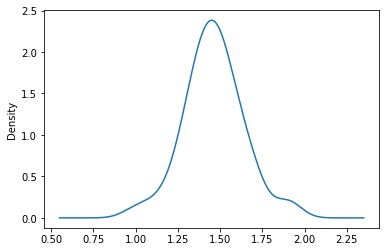

In [ ]:
# 데이터 분포를 통해서 밀도추정함수 표시
iris[iris['species']=='setosa']['petal_length'].plot.density()
plt.show()

- 커널 밀도 추정은 커널함수를 이용한 밀도 추정방법의 하나
- 밀도 추정이란?
    - 추출된 데이터를 이용해서 밀도함수를 구하는 것
    - 확률밀도함수(pdf)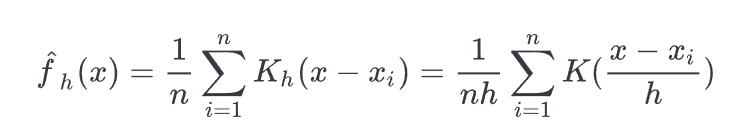

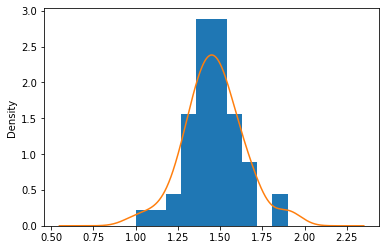

In [ ]:
ax = iris[iris['species']=='setosa']['petal_length'].plot.hist(density=True)
iris[iris['species']=='setosa']['petal_length'].plot.density(ax=ax)
plt.show()
# 그려진 그래프 상 가장 뾰족하게 그려진 부분이 최빈값 구간이며 mode라고 함
# 최빈값, 중앙값, 평균이 유사한 것으로 보임

**왜도(Skewness)**
- 데이터의 분포에 따라서 우측으로 치우쳤는지, 좌측으로 치우쳤는지를 확인
    - negative skewness의 형태를 띠면, mode > median > mean의 값을 갖는다.(=데이터의 중심이 오른쪽으로 치우쳐져있을 때)
    - positive skewness의 형태를 띠면, mean > median > mode의 값을 갖는다.(=데이터의 중심이 왼쪽에 치우쳐져있을 때)


**첨도(Kurtosis)**
- 데이터가 얼마나 평균에 모여있는지
    - Leptokurtic(고첨) : 정규분포보다 많이 몰려있어서 뾰족
    - Mesokutic(중첨) : 정규분포와 유사함
    - Pltyutic(저첨첨) : 정규분포보다 완만

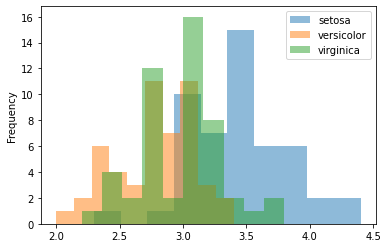

In [ ]:
fig,ax = plt.subplots(1,1)

for species in iris['species'].unique():
    width_series = iris[iris['species']==species]['sepal_width']
    width_series.plot.hist(alpha=0.5, ax=ax, label=species)
plt.legend()
plt.show()

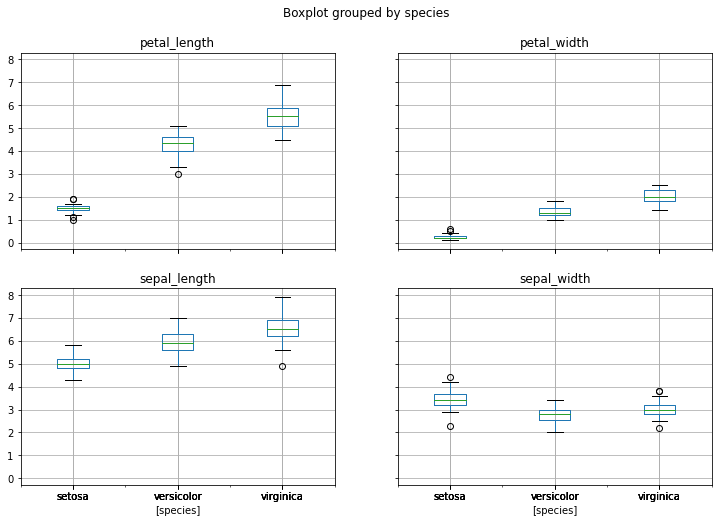

In [ ]:
# Box Plot review
iris.boxplot(by='species', layout=(2,2), figsize=(12,8))
plt.show()

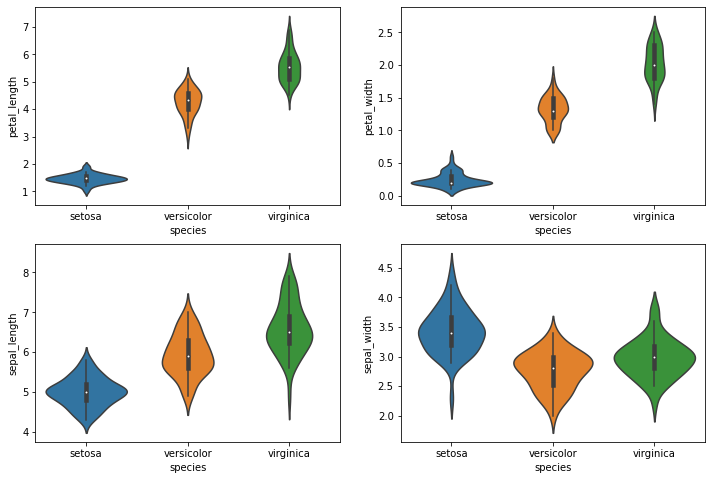

In [ ]:
# Violin plot review
fig, ax = plt.subplots(2,2, figsize=(12,8))
for i, col in enumerate(['petal_length','petal_width','sepal_length','sepal_width']):
    sns.violinplot(data=iris, x='species', y=col, ax=ax[i//2][i%2])

plt.show()

# **데이터의 중심**

**최빈값(mode)**
- 빈도가 가장 높은 값
- 범주형 데이터(category 형식)의 대표값
- 2개 이상 존재할 수 있음
- 극단적인 값들의 영향을 크게 받지 않는 값

**중앙값(median)**
- 데이터를 내림차순하여 가장 중간에 위치한 값
- 짝수개의 데이터일 경우엔, 중앙에 있는 2개의 데이터를 평균낸 값을 중앙값으로 함

**산술평균**
- 일반적으로 사용하는 평균
- 극단값이나 이상치에 큰 영향을 받는 통계량
- 데이터의 갯수로 나눠서 구함
- 절삭평균으로 극단값에 대해 보정

**가중평균**
- 일반적인 산술평균을 구할 때, 각각의 데이터마다 중요도에 따라서 가중치를 부여함
- 가중치를 다 더한 값으로 나누어 구함

**기하평균**
- 성장률이나 증가율 등 비율에 대한 데이터를 평균낼 때 사용하는 통계량
- 음수, 0의 데이터가 있는 경우에는 적용할 수 없음

**편차**
- 데이터 값과 평균을 빼준 값

**분산**
- 편차의 제곱의 합을 데이터 수로 나눈 값
- 편차를 다 더하면 0이 되기 때문에 제곱연산함
- 편차가 큰 데이터 값에 대해 영향 정도를 키우기 위해 제곱연산함

**표준편차**
- 분산에 제곱근을 씌운 값값

# **단어 정의**
**모집단**
- 조사 대상이 되는 모든 집단

**표본(sampling)집단**
- 모집단의 부분집합

**모수**
- 모집단의 어떤 값(평균, 분산 등....)

**통계량**
- 표본집단의 정보

In [ ]:
import numpy as np
data = np.arange(10,20,0.1)

In [ ]:
# 평균
data.mean()

14.949999999999982

In [ ]:
# 평균 구하는 다른 방법
sum_ = 0
for i in data:
  sum_ += i
sum_/len(data)

14.949999999999978

In [ ]:
# 절삭평균으로 구하기
from scipy.stats import trim_mean
data = np.array([1,2,2,3,3,3,4,4,5,10])
mean_ = np.mean(data)
trim_mean_ = trim_mean(data,0.1)
median = np.median(data)
print(f'''
mean = {mean_}
절삭평균 = {trim_mean_}
중앙값 = {median}
''')


mean = 3.7
절삭평균 = 3.25
중앙값 = 3.0



In [ ]:
data = np.array([1,2,2,3,3,3,4,4,5,10])
data_length = len(data)

if data_length % 2 == 0:
    idx = data_length//2
    median = (data[idx] + data[idx+1])/2

else:
    idx = data_length//2
    median = data[idx]
print('중앙값 : ',median)

중앙값 :  3.5


# 가중평균




In [ ]:
# 가중평균 구하기
data = np.array([10,20,30,40,50,60,70,80,90,100])
weights = np.array([0.1,0.05,0.3,0.05,0.15,0.025,0.025,0.05,0.125,0.175])

In [ ]:
len(weights)

10

In [ ]:
len(data)

10

In [ ]:
sum_ = 0
for idx in range(len(data)):
    sum_ += weights[idx]*data[idx]
print(sum_/sum(weights))

53.80952380952381


# 최빈값

In [ ]:
data = np.array([1,1,2,2,2,3,4,5,6,7,7,7,7,7,8,8,9,10])
count_dict=dict()
for d in data:
    if d not in count_dict:
        count_dict[d] = 1
    else:
        count_dict[d] += 1

sorted(count_dict.items(), key=lambda x : x[1], reverse=True)[0][0]

7

In [ ]:
# lambda x : x[1]의 의미(?)
#def func(x):
#    return x[1]

# 편차, 분산, 표준편차

In [ ]:
norm = np.random.normal(10.0, 2.0, 100)

In [ ]:
norm.size

100

In [ ]:
# 평균 구하기
norm_mean = norm.mean()

In [ ]:
[i-norm_mean for i in norm]

[3.7412319311776816,
 -4.195182552264654,
 -0.032861211525766265,
 1.534871057500725,
 -2.1824985232718044,
 0.8788973078422586,
 -0.3588059976826461,
 3.4437837040404062,
 -3.1510007846729033,
 0.8331125966653907,
 -2.1284859879893574,
 -4.013817555585547,
 1.7681624654889223,
 0.13409686123667797,
 0.9072550079820552,
 0.2132841784884203,
 0.5240546617027046,
 -1.4842378881343574,
 -0.005434090950577897,
 0.46520402650981296,
 2.481281545020485,
 -1.0922250862540892,
 0.6500076250074969,
 -1.778010409143338,
 0.4554434907823648,
 2.8350719736651495,
 -3.054390613927903,
 0.648169467525296,
 1.9728686428754578,
 -2.3806361761933568,
 2.029939419478092,
 0.28081337500957737,
 -1.5701653987247681,
 0.5495157428066602,
 1.186802717128998,
 -3.5412250111023456,
 1.0964617991297878,
 0.028884916863436416,
 -2.6522099272755106,
 -3.527079283486543,
 5.816137812130426,
 -1.7946184019378215,
 0.4758547316636843,
 -0.03973869341781899,
 -1.3014790451059017,
 -0.638193558124506,
 1.408015501752

In [ ]:
# 편차
norm_dev = [i-norm_mean for i in norm]

In [ ]:
# 분산
norm_var = sum([i**2 for i in norm_dev])/(len(norm)-1)

In [ ]:
# 표준편차(python 내의 math 라이브러리 기능 사용)
import math
math.sqrt(norm_var)

1.8349792523435733

In [ ]:
# numpy 내의 std 메소드 사용
np.std(norm)

1.825781303433154

# **기하평균**

In [ ]:
score_rate = [1.1,2.1,0.91,0.14,0.51]
mul_ = 1
for rate in score_rate:
    mul_ *= rate

geometric_mean = mul_ ** (1/len(score_rate))
geometric_mean

0.6843374651564551

# 실습

In [ ]:
import seaborn as sns
dataset = sns.get_dataset_names()

In [ ]:
dataset

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
pgs = sns.load_dataset('penguins')

In [ ]:
pgs

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
pgs.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
pgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# null값인 펭귄
pgs[pgs['flipper_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
# null값인 부분을 0으로 대체
bill_length_mm = pgs[pgs['bill_length_mm'].isnull()==False]
bill_depth_mm = pgs[pgs['bill_depth_mm'].isnull()==False]
flipper_length_mm = pgs[pgs['flipper_length_mm'].isnull()==False]
body_mass_g = pgs[pgs['body_mass_g'].isnull()==False]
notnull_pgs = pgs[pgs['sex'].isnull()==False]

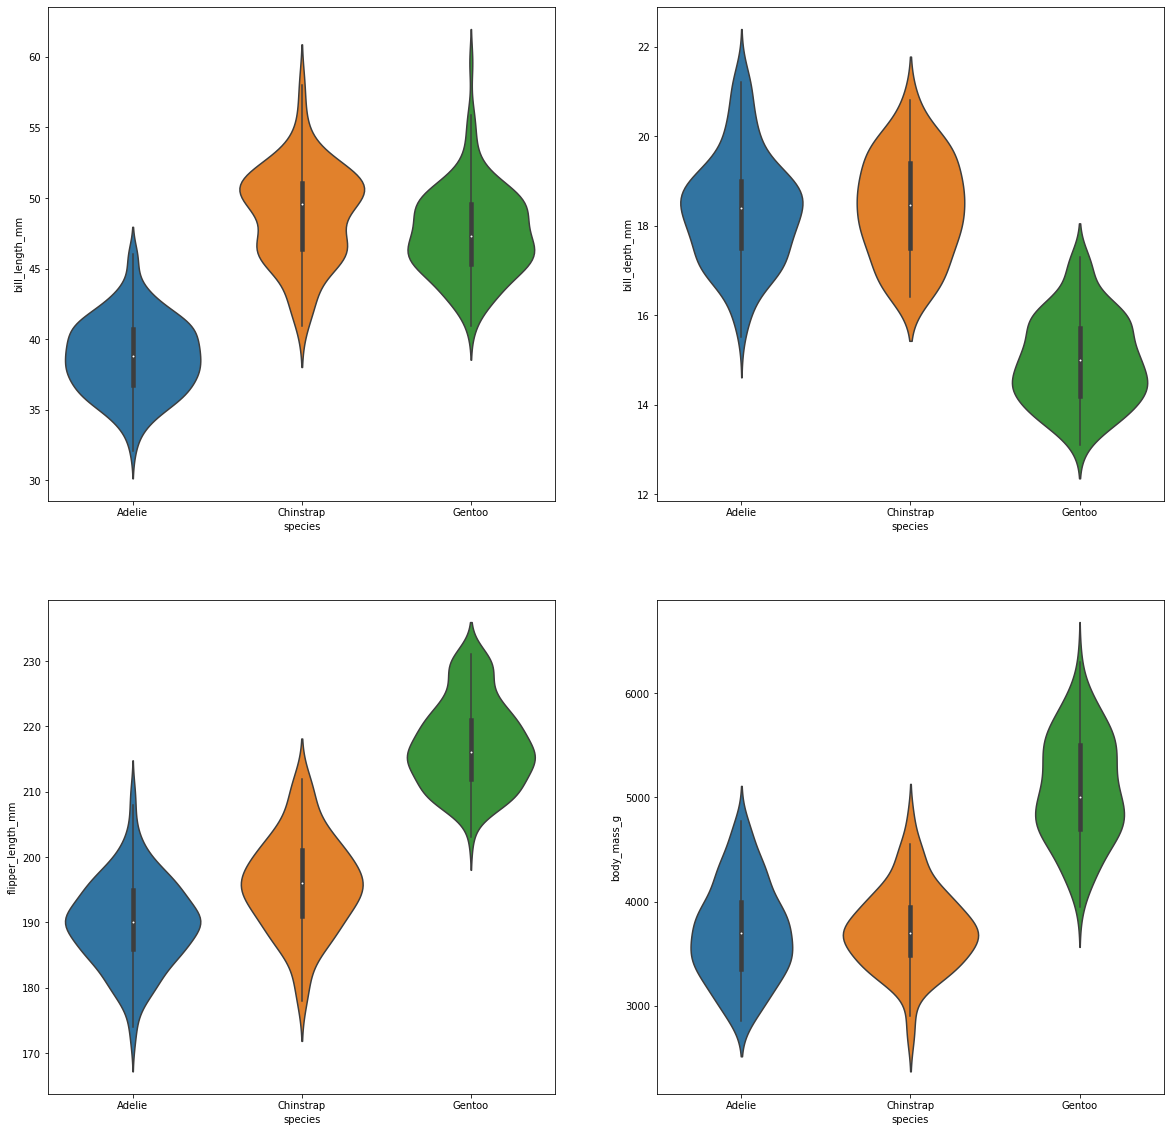

In [ ]:
# Violin plot
fig, ax = plt.subplots(2,2, figsize=(20,20))

for i, col in enumerate(['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']):
    sns.violinplot(data=pgs, x='species', y=col, ax=ax[i//2][i%2])
    # ax=ax[i//2][i%2] : 그릴 팔레트의 위치를 지정함

plt.show()

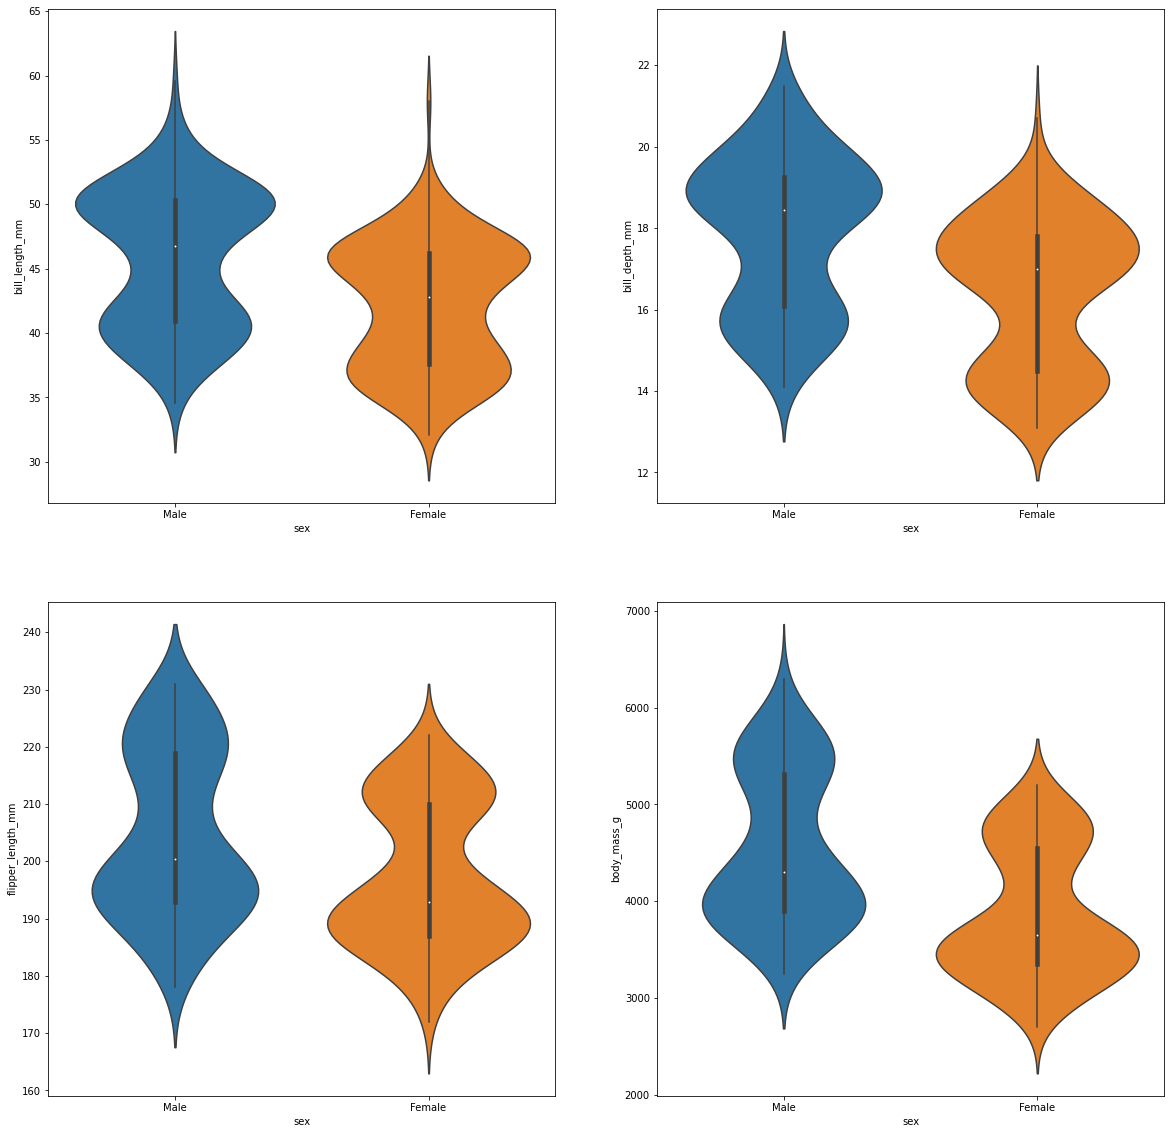

In [ ]:
# Violin plot
fig, ax = plt.subplots(2,2, figsize=(20,20))

for i, col in enumerate(['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']):
    sns.violinplot(data=notnull_pgs, x='sex', y=col, ax=ax[i//2][i%2])
    # ax=ax[i//2][i%2] : 그릴 팔레트의 위치를 지정함

plt.show()

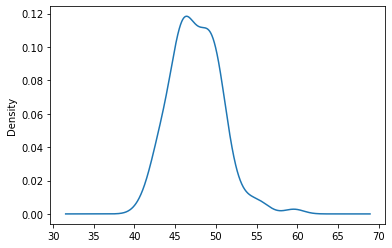

In [ ]:
notnull_pgs[notnull_pgs['species']=='Gentoo']['bill_length_mm'].plot.density()
plt.show()